# Regional Domain Comparisons

Comparative analysis of occupational domain demand patterns across global regions, focusing on how O*NET task requirements vary by geographic market.

In [5]:
# Install and import required packages
import subprocess
import sys

packages = ['pandas', 'numpy', 'matplotlib', 'seaborn']

for package in packages:
    try:
        __import__(package)
        print(f"✓ {package} already installed")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

print("Package installation complete!")

# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style (consistent with other analysis notebooks)
plt.style.use('default')
sns.set_palette("husl")

# Load the domain regional dataset
df = pd.read_csv('domainregional.csv')

print(f"Dataset shape: {df.shape}")
print(f"Available regions: {sorted(df['region'].unique())}")
print(f"Available domains: {sorted(df['domain'].unique())}")
print(f"Total records: {len(df)}")

✓ pandas already installed
✓ numpy already installed
✓ matplotlib already installed
✓ seaborn already installed
Package installation complete!
Dataset shape: (60, 6)
Available regions: ['APAC', 'Europe', 'Latin America', 'Middle East & Africa', 'North America']
Available domains: ['Administrative_Support', 'Business_Management', 'Creative_Communications', 'Customer_Service', 'Education_Training', 'Financial_Services', 'Healthcare_Medical', 'Professional_Services', 'Research_Analysis', 'Software_Development', 'none', 'not_classified']
Total records: 60


## Data Overview

This analysis examines occupational domain demand across **5 global regions** using **10 distinct occupational domains** derived from O*NET task classifications. The data represents aggregated task demand patterns from Claude AI usage, providing insights into regional workforce and skill requirements.

**Key Research Question**: How do occupational domain demands vary across different global regions, and what do these patterns reveal about regional economic specialization and workforce development priorities?

### Top O*NET Tasks by Region

Regional specialization reflected in most demanded occupational tasks (excluding meta-categories):

In [6]:
# Load raw O*NET task data to show top tasks by region
df_raw = pd.read_csv('onetregionalraw.csv')

# Define regions for consistent ordering
regions = ['North America', 'Latin America', 'Europe', 'Middle East & Africa', 'APAC']

print("🎯 TOP 5 O*NET TASKS BY REGION")
print("=" * 120)

for region in regions:
    print(f"\n📍 {region.upper()}:")
    print("-" * 60)
    
    # Get top 5 tasks for this region (excluding meta-categories)
    region_data = df_raw[
        (df_raw['region'] == region) & 
        (~df_raw['domain'].isin(['none', 'not_classified']))
    ].sort_values('value', ascending=False).head(5)
    
    for i, (_, row) in enumerate(region_data.iterrows(), 1):
        task = row['cluster_name']
        count = int(row['value'])
        domain = row['domain'].replace('_', ' ')
        
        # Show full task description
        print(f"{i:2d}. {task}")
        print(f"    Count: {count:,} | Domain: {domain}")
        print()

print(f"{'='*120}")
print("Complete task descriptions shown for detailed regional analysis")

🎯 TOP 5 O*NET TASKS BY REGION

📍 NORTH AMERICA:
------------------------------------------------------------
 1. correct errors by making appropriate changes and rechecking the program to ensure that the desired results are produced.
    Count: 3,374 | Domain: Software Development

 2. assist students who need extra help with their coursework outside of class.
    Count: 2,151 | Domain: Education Training

 3. analyze user needs and software requirements to determine feasibility of design within time and cost constraints.
    Count: 1,517 | Domain: Research Analysis

 4. confer with clients regarding the nature of the information processing or computation needs a computer program is to address.
    Count: 1,263 | Domain: Software Development

 5. develop instructional materials to be used by educators and instructors.
    Count: 1,250 | Domain: Education Training


📍 LATIN AMERICA:
------------------------------------------------------------
 1. correct errors by making appropriate cha

## Regional Domain Distribution Comparison

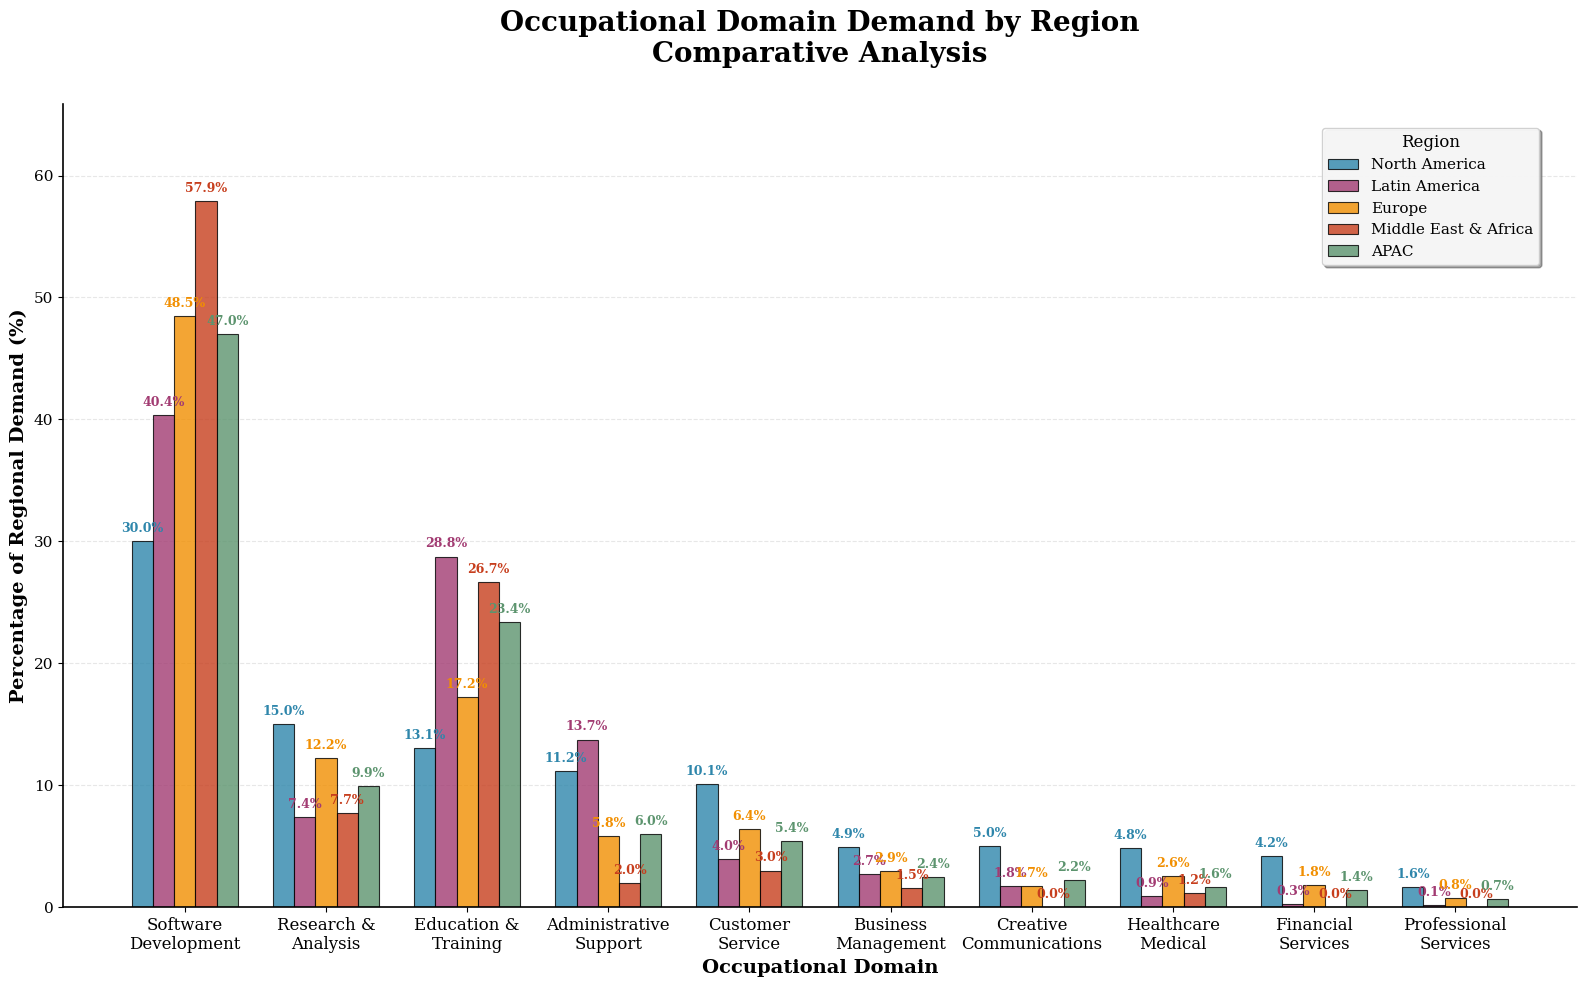


📊 REGIONAL OCCUPATIONAL DOMAIN COMPARISON
Domain                         N. America   Latin Am.    Europe       MEA          APAC        
----------------------------------------------------------------------------------------------------
Software Development                30.0%        40.4%        48.5%        57.9%        47.0%  
Research & Analysis                 15.0%         7.4%        12.2%         7.7%         9.9%  
Education & Training                13.1%        28.8%        17.2%        26.7%        23.4%  
Administrative Support              11.2%        13.7%         5.8%         2.0%         6.0%  
Customer Service                    10.1%         4.0%         6.4%         3.0%         5.4%  
Business Management                  4.9%         2.7%         2.9%         1.5%         2.4%  
Creative Communications              5.0%         1.8%         1.7%         0.0%         2.2%  
Healthcare Medical                   4.8%         0.9%         2.6%         1.2%        

In [7]:
# Regional Domain Distribution Comparison
# Set custom font and style (consistent with other analysis notebooks)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

# Define regions and colors (exact match with other analysis notebooks)
regions = ['North America', 'Latin America', 'Europe', 'Middle East & Africa', 'APAC']
regional_colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#5C946E']  # Exact same colors

# Define domain order (excluding meta-categories for main visualization)
domain_order = [
    'Software_Development',
    'Research_Analysis', 
    'Education_Training',
    'Administrative_Support',
    'Customer_Service',
    'Business_Management',
    'Creative_Communications',
    'Healthcare_Medical',
    'Financial_Services',
    'Professional_Services'
]

domain_labels = [
    'Software\nDevelopment',
    'Research &\nAnalysis',
    'Education &\nTraining',
    'Administrative\nSupport',
    'Customer\nService',
    'Business\nManagement',
    'Creative\nCommunications',
    'Healthcare\nMedical',
    'Financial\nServices',
    'Professional\nServices'
]

# Collect data for all regions (excluding none and not_classified)
regional_data = {}
for region in regions:
    region_df = df[(df['region'] == region) & (~df['domain'].isin(['none', 'not_classified']))]
    
    percentages = []
    for domain in domain_order:
        domain_pct = region_df[region_df['domain'] == domain]['percentage'].values
        percentage = float(domain_pct[0]) if len(domain_pct) > 0 else 0.0
        percentages.append(percentage)
    
    regional_data[region] = percentages

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(16, 10))

# Set up bar positions
x = np.arange(len(domain_labels))
width = 0.15  # Width of each bar
bar_positions = []

# Calculate positions for each region
for i, region in enumerate(regions):
    positions = x + (i - 2) * width  # Center the bars around x
    bar_positions.append(positions)

# Plot bars for each region
bars = []
for i, region in enumerate(regions):
    bars.append(ax.bar(bar_positions[i], regional_data[region], width, 
                      label=region, color=regional_colors[i], 
                      edgecolor='black', linewidth=0.8, alpha=0.8))

# Customize the chart
ax.set_title('Occupational Domain Demand by Region\nComparative Analysis', 
             fontsize=20, fontweight='bold', pad=30, family='serif')
ax.set_xlabel('Occupational Domain', fontsize=14, fontweight='bold', family='serif')
ax.set_ylabel('Percentage of Regional Demand (%)', fontsize=14, fontweight='bold', family='serif')

# Set x-axis
ax.set_xticks(x)
ax.set_xticklabels(domain_labels, fontsize=12, family='serif')
ax.tick_params(axis='y', labelsize=11)

# Add grid for easier reading
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add percentage labels on top of bars
for i, region in enumerate(regions):
    for j, percentage in enumerate(regional_data[region]):
        height = percentage
        ax.text(bar_positions[i][j], height + 0.5, f'{percentage:.1f}%',
                ha='center', va='bottom', fontsize=9, fontweight='bold',
                color=regional_colors[i], family='serif')

# Add legend positioned on the right side
legend = ax.legend(title='Region', loc='upper right', frameon=True,
                  fancybox=True, shadow=True, fontsize=11, title_fontsize=12,
                  bbox_to_anchor=(0.98, 0.98))
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.9)

# Style the frame
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set y-axis limit for better visualization (extra space for percentage labels)
max_percentage = max([max(percentages) for percentages in regional_data.values()])
ax.set_ylim(0, max_percentage + 8)

plt.tight_layout()
plt.show()

# Print detailed comparison table
print(f"\n{'='*100}")
print(f"📊 REGIONAL OCCUPATIONAL DOMAIN COMPARISON")
print(f"{'='*100}")
print(f"{'Domain':<30} {'N. America':<12} {'Latin Am.':<12} {'Europe':<12} {'MEA':<12} {'APAC':<12}")
print("-" * 100)

for i, domain in enumerate(domain_labels):
    domain_clean = domain.replace('\n', ' ')
    row = f"{domain_clean:<30}"
    for region in regions:
        percentage = regional_data[region][i]
        row += f"{percentage:>10.1f}%  "
    print(row)

print(f"\n🔍 Key Regional Observations:")
print(f"• Software Development: Highest demand varies significantly by region")
print(f"• Research & Analysis: Strong secondary pattern in developed regions")
print(f"• Education & Training: Significant investment across all regions")
print(f"• Regional specialization suggests different economic development stages")
print(f"{'='*100}")

## Regional Domain Profiles Summary

In [8]:
# Regional Domain Profiles - Top 5 Domains per Region
print("🌍 REGIONAL OCCUPATIONAL DOMAIN PROFILES")
print("=" * 70)

# Create summary for each region (excluding none and not_classified)
for region in regions:
    print(f"\n📍 {region.upper()}:")
    
    # Get percentage data for this region (excluding meta-categories)
    region_data = df[(df['region'] == region) & 
                     (~df['domain'].isin(['none', 'not_classified']))]
    
    # Sort by percentage and get top 5
    region_sorted = region_data.sort_values('percentage', ascending=False).head(5)
    
    for i, (_, row) in enumerate(region_sorted.iterrows(), 1):
        domain = row['domain'].replace('_', ' ')
        percentage = row['percentage']
        count = int(row['value'])
        print(f"  {i}. {domain}: {percentage:.1f}% ({count:,} tasks)")

print(f"\n📊 OCCUPATIONAL DOMAIN DEFINITIONS:")
print("-" * 70)
print("• Software Development: Programming, coding, technical systems")
print("• Research & Analysis: Scientific research, data analysis, field studies")
print("• Education & Training: Teaching, instruction, curriculum development")
print("• Administrative Support: Office administration, clerical work")
print("• Customer Service: Customer support, client assistance")
print("• Business Management: Operations, strategy, consulting")
print("• Creative Communications: Design, marketing, content creation")
print("• Healthcare Medical: Patient care, medical programs, wellness")
print("• Financial Services: Banking, investment, financial planning")
print("• Professional Services: Legal, engineering, specialized consulting")
print("=" * 70)

🌍 REGIONAL OCCUPATIONAL DOMAIN PROFILES

📍 NORTH AMERICA:
  1. Software Development: 30.0% (15,268 tasks)
  2. Research Analysis: 15.0% (7,644 tasks)
  3. Education Training: 13.1% (6,645 tasks)
  4. Administrative Support: 11.2% (5,683 tasks)
  5. Customer Service: 10.1% (5,135 tasks)

📍 LATIN AMERICA:
  1. Software Development: 40.4% (4,344 tasks)
  2. Education Training: 28.8% (3,094 tasks)
  3. Administrative Support: 13.7% (1,479 tasks)
  4. Research Analysis: 7.4% (795 tasks)
  5. Customer Service: 4.0% (427 tasks)

📍 EUROPE:
  1. Software Development: 48.5% (11,953 tasks)
  2. Education Training: 17.2% (4,249 tasks)
  3. Research Analysis: 12.2% (3,011 tasks)
  4. Customer Service: 6.4% (1,586 tasks)
  5. Administrative Support: 5.8% (1,435 tasks)

📍 MIDDLE EAST & AFRICA:
  1. Software Development: 57.9% (4,707 tasks)
  2. Education Training: 26.7% (2,170 tasks)
  3. Research Analysis: 7.7% (628 tasks)
  4. Customer Service: 3.0% (244 tasks)
  5. Administrative Support: 2.0% (16

## Strategic Insights

### Key Regional Patterns

**[INSERT KEY REGIONAL INSIGHTS HERE]**

_Example areas to explore:_
- _Which regions show the highest software development vs. traditional service sector demand?_
- _How do occupational domain patterns correlate with regional economic development stages?_
- _What do domain distributions suggest about regional competitive advantages?_

### Business and Economic Implications

**[INSERT BUSINESS IMPLICATIONS HERE]**

_Consider implications for:_
- _Regional workforce development and training priorities_
- _International talent acquisition and deployment strategies_
- _Market entry strategies based on local domain expertise_
- _Educational institution partnerships and curriculum development_

### Cross-Analysis Integration

**[INSERT CROSS-ANALYSIS INSIGHTS HERE]**

_Cross-reference with other analyses:_
- _How do occupational domain patterns align with software development SDLC preferences?_
- _Do regions with high software development demand also show specific collaboration patterns?_
- _What does this suggest about regional technology adoption and digital transformation?_

### Strategic Recommendations

**[INSERT STRATEGIC RECOMMENDATIONS HERE]**

_Potential focus areas:_
- _Region-specific workforce development programs_
- _Technology transfer and knowledge sharing initiatives_
- _Investment priorities based on regional domain strengths_
- _Global talent mobility and skill matching opportunities_